<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Neural Nets for Sequential Data

-----
**OBJECTIVES**

- Explore Recurrent Architectures for sequential data
- Explore Convolutional Architectures for sequential data
- Use RNN's to model numeric time series data
- Use RNN's and CNN's to model text data
------

## The Recurrent Node

Compared to a convential neuron, our recurrent neuron will take in an output from the layer itself.  

<center>
   <img src = https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Recurrent_neural_network_unfold.svg/440px-Recurrent_neural_network_unfold.svg.png />
</center>



### The Network Architecture

```python
state_t = 0
for input_t in input_sequences:
    output_t = tanh(W@input_t + U@state_t + b)
    state_t = output_t
```



### A Basic Sequence of Stock Prices

To begin, let's bring in stock data from yahoo using the `pandas_datareader`. 

In [18]:
import pandas_datareader as pdr
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install -U pandas_datareader

In [4]:
#get apple stock
apple = pdr.get_data_yahoo("AAPL")
#apple2 = pd.read_csv('appl.csv', index_col = 0)

In [5]:
#take a peek
apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-04-12,35.537498,35.252499,35.400002,35.450001,81400000.0,33.470463
2017-04-13,35.595001,35.262501,35.477501,35.262501,71291600.0,33.293438
2017-04-17,35.470001,35.217499,35.369999,35.457500,66328400.0,33.477547
2017-04-18,35.509998,35.277500,35.352501,35.299999,58790000.0,33.328838
2017-04-19,35.500000,35.112499,35.470001,35.169998,69313600.0,33.206093


In [ ]:
# apple.to_csv('appl.csv')

<AxesSubplot:xlabel='Date'>

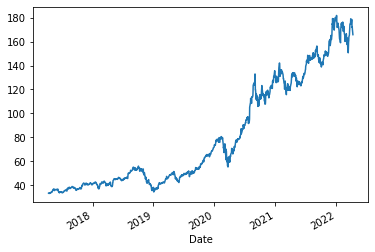

In [6]:
#plot the adjusted close
apple['Adj Close'].plot()

<AxesSubplot:xlabel='Date'>

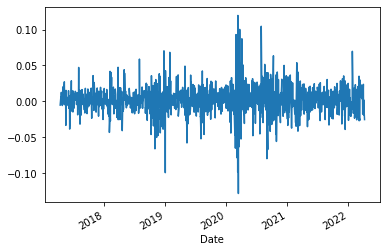

In [7]:
#look at the percent change
apple['Adj Close'].pct_change().plot()
# this looks more stationary than looking at the adjusted close

In [11]:
#determine X and y
# drop na drops the first date- since there will be no prior
apple_pchange = apple.pct_change().dropna()
X = apple_pchange[['High', 'Low', 'Open', 'Volume']]
y2 = apple_pchange['Adj Close']

In [9]:
apple_pchange

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-04-13,0.001618,0.000284,0.002189,-0.005289,-0.124182,-0.005289
2017-04-17,-0.003512,-0.001276,-0.003030,0.005530,-0.069618,0.005530
2017-04-18,0.001128,0.001704,-0.000495,-0.004442,-0.113653,-0.004442
2017-04-19,-0.000282,-0.004677,0.003324,-0.003683,0.179003,-0.003683
2017-04-20,0.006479,0.005055,-0.004652,0.012511,0.345745,0.012511
...,...,...,...,...,...,...
2022-04-05,-0.001064,-0.000115,0.016784,-0.018942,-0.040103,-0.018942
2022-04-06,-0.026192,-0.024596,-0.028958,-0.018451,0.213305,-0.018451
2022-04-07,-0.001555,-0.001646,-0.006962,0.001804,-0.128725,0.001804


In [13]:
#train test split: no shuffle!
y = np.where(y2>0, 1, 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)

#make a classification problem
# using pct change in high low open and volume to predict whether it
# was a postitive or negative

### Scaling
------

Per usual we need to scale our data for the network.

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
#instantiate
scaler = StandardScaler()


In [16]:
#fit and transform
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

### `TimeSeriesGenerator`
-------
This creates stacks of sequenced data of which we specify the length of the sequences desired.

In [20]:
!pip install tensorflow
!pip install keras

In [22]:
# to structure the data we use the time series generator
# this creates little time stacks that we will feed the data into
from keras.preprocessing.sequence import TimeseriesGenerator

In [25]:
train_sequences = TimeseriesGenerator(x_train, y_train, length =3)

In [27]:
list(train_sequences)
# we're getting these three day chunks
# we'll use the previous 3 days to predict the current 3 days

[(array([[[ 0.00551738, -0.06866389,  0.03054953, -0.46991446],
          [-0.29432972, -0.15389036, -0.22933031, -0.32844843],
          [-0.02315059,  0.00891814, -0.10308813, -0.4426157 ]],
  
         [[-0.29432972, -0.15389036, -0.22933031, -0.32844843],
          [-0.02315059,  0.00891814, -0.10308813, -0.4426157 ],
          [-0.10552064, -0.33970516,  0.08703411,  0.31614895]],
  
         [[-0.02315059,  0.00891814, -0.10308813, -0.4426157 ],
          [-0.10552064, -0.33970516,  0.08703411,  0.31614895],
          [ 0.2896385 ,  0.1920264 , -0.31007663,  0.74845672]],
  
         ...,
  
         [[-0.46641156,  0.14479878, -0.10716923,  0.06597923],
          [ 0.05615435, -0.09118257,  0.04285537, -0.26764953],
          [-0.12249001,  0.15440238,  0.04255567, -0.10468266]],
  
         [[ 0.05615435, -0.09118257,  0.04285537, -0.26764953],
          [-0.12249001,  0.15440238,  0.04255567, -0.10468266],
          [ 0.92180353,  0.3489701 ,  0.29323829,  1.07409531]],
  
   

In [28]:
test_sequences = TimeseriesGenerator(x_test, y_test, length =3)

### Model with `SimpleRNN`
--------

- 1 `SimpleRNN` layer
- 1 hidden `Dense` layer

In [29]:
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, GRU, Dense

In [35]:
#build the network
rnn_model = Sequential()
# we have stacks of 3 features with 4 columns
# the 8 is the number of nodes
rnn_model.add(SimpleRNN(8, input_shape = (3, 4)))
# the results of this layer ^ will be fed into this next layer
rnn_model.add(Dense(20, activation = 'relu'))
rnn_model.add(Dense(1, activation = 'sigmoid'))


In [36]:
#compilation
rnn_model.compile(loss = 'bce', metrics = ['acc'])

In [37]:
#fit it
history = rnn_model.fit(train_sequences, validation_data = test_sequences,
                        epochs = 30)

Epoch 1/30
8/8 [==============================] - 1s 32ms/step - loss: 0.7045 - acc: 0.5479 - val_loss: 0.6985 - val_acc: 0.5256
Epoch 2/30
8/8 [==============================] - 0s 7ms/step - loss: 0.6985 - acc: 0.5489 - val_loss: 0.6952 - val_acc: 0.5321
Epoch 3/30
8/8 [==============================] - 0s 7ms/step - loss: 0.6957 - acc: 0.5426 - val_loss: 0.6935 - val_acc: 0.5321
Epoch 4/30
8/8 [==============================] - 0s 7ms/step - loss: 0.6941 - acc: 0.5383 - val_loss: 0.6926 - val_acc: 0.5256
Epoch 5/30
8/8 [==============================] - 0s 6ms/step - loss: 0.6928 - acc: 0.5404 - val_loss: 0.6920 - val_acc: 0.5385
Epoch 6/30
8/8 [==============================] - 0s 8ms/step - loss: 0.6919 - acc: 0.5383 - val_loss: 0.6917 - val_acc: 0.5321
Epoch 7/30
8/8 [==============================] - 0s 7ms/step - loss: 0.6913 - acc: 0.5351 - val_loss: 0.6917 - val_acc: 0.5321
Epoch 8/30
8/8 [==============================] - 0s 8ms/step - loss: 0.6908 - acc: 0.5372 - val_loss: 

In [ ]:
#loss?


### The `LSTM` and `GRU` layers

In [ ]:
#network with LSTM
model2 = Sequential()
model2.add(LSTM(16))
model2.add(Dense(50, activation = 'relu'))
model2.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#compile
model2.compile(loss = 'bce', metrics = ['accuracy'])

In [ ]:
#fit


In [ ]:
#examine the loss
plt.plot(history.history['loss'], label = 'Train')
plt.plot(history.history['val_loss'], label = 'Val')
plt.legend();

In [ ]:
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = 'Val')
plt.legend();

In [ ]:
#GRU layer
model3 = Sequential()
model3.add(GRU(16))
model3.add(Dense(50, activation = 'relu'))
model3.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#compile
model3.compile(loss = 'bce', metrics = ['accuracy'])

In [ ]:
#train_sequences.targets

In [ ]:
#fit


In [ ]:
#examine the loss


In [ ]:
#stacking layers
model4 = Sequential()
model4.add(GRU(32, return_sequences = True))
# model4.add(GRU(16, return_sequences = True))
# model4.add(GRU(16, return_sequences = True))
model4.add(GRU(16))
model4.add(Dense(100, activation = 'relu'))
model4.add(Dense(1, activation = 'sigmoid'))
model4.compile(loss = 'bce', metrics = ['accuracy'])
history = model4.fit(train_sequences, validation_data = test_sequences, epochs = 10)

### Practice

Use pandas datareader to access stock data for a ticker of interest.  Build and compare different sequential models using `GRU` layers.   

### Sequential Models for Text
-------

Now, we use the Keras `Tokenizer` to preprocess our spam data and feed it through different architectures of sequential network models.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
spam = pd.read_csv('data/sms_spam.csv')

In [ ]:
spam.head()

### `Tokenizer`
------
Here, we set the limit to the number of words at 500, then fit the texts, and finally transform our text to sequences of integer values with the `.texts_to_sequences`.  To assure the same length we use the `pad_sequences` function.  

In [ ]:
#create a tokenizer and specify the vocabulary
tokenizer = Tokenizer(500)

In [ ]:
#fit it on text
tokenizer.fit_on_texts(spam['text'])

In [ ]:
#generate sequences
sequences = tokenizer.texts_to_sequences(spam['text'])

In [ ]:
sequences[:3]

In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
#pad sequences to 100
X = pad_sequences(sequences, maxlen = 100)

In [ ]:
#take a peek
X[0]

### Model
-------

In [ ]:
from keras.layers import Embedding

In [ ]:
#sequential model
text_model1 = Sequential()
#embedding layer
text_model1.add(Embedding(input_dim = tokenizer.num_words, output_dim = 64))
#simple RNN
text_model1.add(SimpleRNN(16))
#dense layer
text_model1.add(Dense(20, activation = 'relu'))
#output
text_model1.add(Dense(1, activation = 'sigmoid'))
#compilation
text_model1.compile(loss = 'bce', metrics = ['accuracy'])

In [ ]:
#make y binary
y = np.where(spam['type'] == 'ham', 0, 1)

In [ ]:
#baseline?


In [ ]:
#fit it


### Improving the Model
-----

- `LSTM` layers
- `GRU` layers
- `recurrent_dropout`
- `dropout`
- `Bidirectional` layers

In [ ]:
# model = Sequential()
# model.add(Embedding(input_dim = tokenizer.num_words, output_dim = 64))
# model.add(GRU(16))
# model.add(Dense(20, activation = 'relu'))
# model.add(Dense(1, activation = 'sigmoid'))
# model.compile(loss = 'bce', optimizer = 'adam', metrics = ['acc'])
# model.fit(X, y, epochs = 10)

In [ ]:
# model = Sequential()
# model.add(Embedding(input_dim = tokenizer.num_words, output_dim = 64))
# model.add(GRU(16, recurrent_dropout = 0.2))
# model.add(Dense(20, activation = 'relu'))
# model.add(Dense(1, activation = 'sigmoid'))
# model.compile(loss = 'bce', optimizer = 'adam', metrics = ['acc'])
# model.fit(X, y)

In [ ]:
# model = Sequential()
# model.add(Embedding(input_dim = tokenizer.num_words, output_dim = 64))
# model.add(GRU(16, dropout = 0.2, recurrent_dropout = 0.2))
# model.add(Dense(20, activation = 'relu'))
# model.add(Dense(1, activation = 'sigmoid'))
# model.compile(loss = 'bce', optimizer = 'adam', metrics = ['acc'])
# model.fit(x_seq, y)

In [ ]:
from keras.layers import Bidirectional

In [ ]:
# model = Sequential()
# model.add(Embedding(input_dim = tokenizer.num_words, output_dim = 64))
# model.add(Bidirectional(GRU(16)))
# model.add(Dense(20, activation = 'relu'))
# model.add(Dense(1, activation = 'sigmoid'))
# model.compile(loss = 'bce', optimizer = 'adam', metrics = ['acc'])
# model.fit(x_seq, y)

### Convolutional Networks in 1D
--------

In [ ]:
from keras.layers import Conv1D, MaxPooling1D